# E.P | Business Analytics
----

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from datetime import datetime
from numpy import median
import warnings
warnings.filterwarnings('ignore')

## Loading datasets

In [2]:
country = pd.read_csv('data/country.csv')
country.drop(columns = 'date_created', axis = 1, inplace = True)

In [3]:
investment = pd.read_csv('data/investment.csv')

In [4]:
investor = pd.read_csv('data/investor.csv')

In [5]:
investor_work = pd.read_csv('data/investor_work.csv')

In [6]:
investor_company = pd.read_csv('data/investor_company.csv')

In [7]:
investor_address = pd.read_csv('data/investor_address.csv')

In [8]:
project = pd.read_csv('data/project.csv')

In [9]:
project_category = pd.read_csv('data/project_category.csv')

## Exploratory Data Analysis - Pt. 1

### Investment Data

#### Data Head

In [10]:
investment

,id,date_created,anonymous,investor,project,value
0,19,2018-09-03 11:58:17,0,3,1,1000
1,20,2018-09-03 20:43:34,0,16,1,81000
2,21,2018-09-03 21:15:45,0,6,1,15000
3,26,2018-09-06 11:38:37,0,11,1,10000
4,28,2018-09-06 13:53:35,1,34,1,5000
...,...,...,...,...,...,...
9118,12348,2022-06-03 15:43:26,0,15144,86,5000
9119,12349,2022-06-03 17:10:55,1,25327,86,1000
9120,12350,2022-06-03 17:12:51,0,25327,83,5500
9121,12351,2022-06-03 17:57:04,1,8288,86,20000


#### Basic Info

In [11]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9123 entries, 0 to 9122
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9123 non-null   int64 
 1   date_created  9123 non-null   object
 2   anonymous     9123 non-null   int64 
 3   investor      9123 non-null   int64 
 4   project       9123 non-null   int64 
 5   value         9123 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 427.8+ KB


**Observations**

- Most variables are int typed, when in fact they shouldn't;
- There are no null values;
- **Next Steps**
    - Change the data types.

#### Checking the value's distribution

In [12]:
round(investment['value'].describe(),2)

count      9123.00
mean      12095.75
std       20985.77
min         500.00
25%        5000.00
50%       10000.00
75%       10000.00
max      600000.00
Name: value, dtype: float64

**Observations**
- In most cases the investment value is less than 10000;

### Project Data

#### Data Head

In [13]:
project.head(10)

,id,date_created,validity,value,project_category,closed,date_open,modality,target
0,1,2018-08-23 18:15:21,2018-10-31 00:00:00,750000,1,2018-11-01,2018-10-01 08:00:00,1,500000
1,4,2018-12-17 20:45:31,2019-02-28 00:00:00,750000,1,2019-03-10,2019-02-10 08:00:00,1,500000
2,5,2019-04-20 13:38:57,2019-06-14 00:00:00,1020000,1,2019-06-15,2019-05-15 08:00:00,1,680000
3,6,2019-07-29 17:26:33,2019-09-04 00:00:00,1200000,5,2019-08-19,2019-08-05 08:00:00,1,800000
4,7,2019-09-10 12:00:00,2019-10-15 23:59:00,810000,2,2019-09-27,2019-09-16 18:00:00,1,540000
5,8,2019-10-21 17:19:29,2019-11-21 18:00:00,600000,1,2019-11-21,2019-10-22 18:00:00,1,400000
6,9,2019-11-07 13:44:28,2019-12-17 23:55:00,1200000,5,2019-12-06,2019-11-18 18:00:00,1,800000
7,10,2019-12-20 16:39:07,2020-02-10 18:00:00,1300000,4,2020-02-10,2020-01-06 18:00:00,1,866667
8,11,2020-01-20 18:28:07,2020-03-04 23:55:00,1750000,2,2020-02-20,2020-01-27 18:30:00,2,1750000
9,13,2020-03-19 18:17:36,2020-06-06 18:00:00,1200000,2,2020-04-29,2020-04-06 09:00:00,2,1200000


In [14]:
project_category

,id,date_created,name
0,1,NaN,Imobiliária
1,2,NaN,Energia
2,3,NaN,Ativos judiciais
3,4,NaN,Agronegócio
4,5,NaN,Comercial
5,6,NaN,Startups


#### Basic Info

In [15]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                60 non-null     int64 
 1   date_created      60 non-null     object
 2   validity          60 non-null     object
 3   value             60 non-null     int64 
 4   project_category  60 non-null     int64 
 5   closed            60 non-null     object
 6   date_open         60 non-null     object
 7   modality          60 non-null     int64 
 8   target            60 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 4.3+ KB


#### Data Distribution

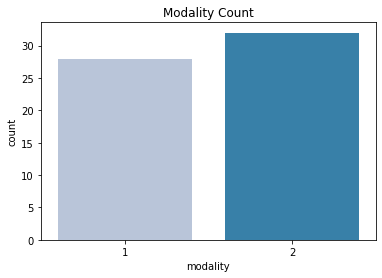

In [16]:
sns.countplot(project['modality'], palette = 'PuBu')
plt.title('Modality Count')
plt.show()

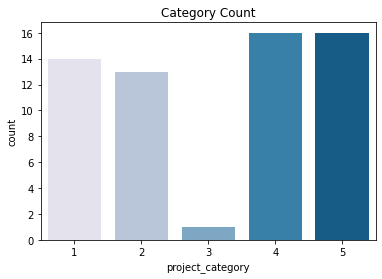

In [17]:
sns.countplot(project['project_category'], palette = 'PuBu')
plt.title('Category Count')
plt.show()

**Observations**
- The amount of products per category is well balanced, except for investments in real estate, where there is only one product available;
- There are more products in the equity modality than in the debt one, but the difference is almost irrelevant.

- **Next Steps:**
    - Change the data types.

### Investor Data

#### Data Head

In [18]:
investor

,id,date_created,birth,marital_status,gender,investor_type,nationality,channel
0,1,2018-08-22 18:42:54,1993-04-01,Casado(a),1.0,pf,brazilian_born,indication
1,3,2018-08-23 18:38:25,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN
2,4,2018-08-25 18:09:51,1983-01-05,Casado(a),1.0,pf,brazilian_born,NaN
3,5,2018-08-26 07:48:54,NaN,NaN,NaN,pf,brazilian_born,NaN
4,6,2018-08-26 10:14:20,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN
...,...,...,...,...,...,...,...,...
22454,26018,2022-06-07 09:16:50,NaN,NaN,NaN,pj,brazilian_born,NaN
22455,26019,2022-06-07 09:17:43,NaN,NaN,NaN,pf,brazilian_born,NaN
22456,26022,2022-06-07 10:33:58,NaN,NaN,NaN,pf,brazilian_born,NaN
22457,26023,2022-06-07 10:35:26,1985-11-24,Casado(a),1.0,pj,brazilian_born,NaN


In [19]:
investor_work

,id,date_created,investor,office,profession
0,5,2018-08-26 13:09:38,7,Diretor,Engenheiro Civil
1,6,2018-08-26 22:35:08,10,estagiário de marketing,Estudante
2,10,2018-08-30 19:28:27,15,CMO,Publicitário
3,12,2018-09-03 20:41:50,16,CEO,Advogado
4,13,2018-09-03 21:56:00,19,CEO,Analista de Sistemas
...,...,...,...,...,...
5324,7360,2022-06-04 08:51:17,25923,autônomo,medico
5325,7361,2022-06-04 10:54:48,25950,gerente,empresario
5326,7362,2022-06-04 18:29:31,25917,diretoe,administrador
5327,7363,2022-06-06 10:53:47,26000,Empresário,Empresário


In [20]:
investor_company

,id,date_created,country,investor,state
0,5,2018-08-26 13:09:38,1,7,PE
1,6,2018-08-26 22:35:08,1,10,BA
2,10,2018-08-30 19:28:27,1,15,BA
3,12,2018-09-03 20:41:50,1,16,SE
4,13,2018-09-03 21:56:00,1,19,BA
...,...,...,...,...,...
12183,15052,2022-06-05 07:39:17,1,25576,MA
12184,15053,2022-06-06 09:52:46,1,25628,MG
12185,15054,2022-06-06 10:53:47,1,26000,CE
12186,15055,2022-06-06 19:27:27,1,24765,BA


In [21]:
investor_address

,id,date_created,country,investor,state
0,5,2018-08-26 13:09:38,1,7,PE
1,6,2018-08-26 22:35:08,1,10,BA
2,10,2018-08-30 19:28:27,1,15,BA
3,12,2018-09-03 20:41:50,1,16,SE
4,13,2018-09-03 21:56:00,1,19,BA
...,...,...,...,...,...
12183,15052,2022-06-05 07:39:17,1,25576,MA
12184,15053,2022-06-06 09:52:46,1,25628,MG
12185,15054,2022-06-06 10:53:47,1,26000,CE
12186,15055,2022-06-06 19:27:27,1,24765,BA


**Observation**

- Since all the data is very related to each other, it is likely that by analyzing then together it will be possible to gain more insights

## Preprocessing - Pt. 1

### Investor data

#### Renaming columns

In [22]:
investor.rename({'id':'investor_id'}, axis = 1, inplace = True)
investor_work.rename({'investor':'investor_id'}, axis = 1, inplace = True)
investor_company.rename({'investor':'investor_id'}, axis = 1, inplace = True)
investor_address.rename({'investor':'investor_id'}, axis = 1, inplace = True)

#### Joining data

In [23]:
investor_data = investor.merge(investor_work, on = 'investor_id', how = 'left')
investor_data = investor_data.merge(investor_address, on = 'investor_id', how = 'left')

In [24]:
investor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 22458
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   investor_id     22459 non-null  int64  
 1   date_created_x  22459 non-null  object 
 2   birth           12243 non-null  object 
 3   marital_status  5454 non-null   object 
 4   gender          12031 non-null  float64
 5   investor_type   22459 non-null  object 
 6   nationality     22459 non-null  object 
 7   channel         5523 non-null   object 
 8   id_x            5329 non-null   float64
 9   date_created_y  5329 non-null   object 
 10  office          5260 non-null   object 
 11  profession      5323 non-null   object 
 12  id_y            12188 non-null  float64
 13  date_created    12188 non-null  object 
 14  country         12188 non-null  float64
 15  state           12187 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 2.9+ MB


#### Selecting columns and renaming columns

In [25]:
investor_data.drop(columns = ['id_x', 'id_y', 'date_created_y', 'date_created'], inplace = True)
investor_data.rename({'date_created_x':'date_created'}, axis = 1, inplace = True)

#### Investor Data Head

In [26]:
investor_data.head()

,investor_id,date_created,birth,marital_status,gender,investor_type,nationality,channel,office,profession,country,state
0,1,2018-08-22 18:42:54,1993-04-01,Casado(a),1.0,pf,brazilian_born,indication,CTO,Empresário,1.0,BA
1,3,2018-08-23 18:38:25,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN,CFO,Administrador,1.0,BA
2,4,2018-08-25 18:09:51,1983-01-05,Casado(a),1.0,pf,brazilian_born,NaN,Diretor,Administrador,1.0,BA
3,5,2018-08-26 07:48:54,NaN,NaN,NaN,pf,brazilian_born,NaN,NaN,NaN,NaN,NaN
4,6,2018-08-26 10:14:20,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN,Partner,Empresario,1.0,BA


#### Calculating the investor age when he invested

##### Converting to datetime type and creating a new column only with the date

In [27]:
investor_data['date_created'] = pd.to_datetime(investor_data['date_created'])
investor_data['date'] = pd.to_datetime(investor_data['date_created'].dt.strftime('%Y-%m-%d'))
investor_data['birth'] = pd.to_datetime(investor_data['birth'], errors = 'coerce')

In [28]:
investor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 22458
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   investor_id     22459 non-null  int64         
 1   date_created    22459 non-null  datetime64[ns]
 2   birth           12228 non-null  datetime64[ns]
 3   marital_status  5454 non-null   object        
 4   gender          12031 non-null  float64       
 5   investor_type   22459 non-null  object        
 6   nationality     22459 non-null  object        
 7   channel         5523 non-null   object        
 8   office          5260 non-null   object        
 9   profession      5323 non-null   object        
 10  country         12188 non-null  float64       
 11  state           12187 non-null  object        
 12  date            22459 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(7)
memory usage: 2.4+ MB


##### Creating a new variable that represents the age the investor was when he was registered

In [29]:
investor_data['age_created'] = round(investor_data.apply(lambda data: ((pd.Timestamp.to_pydatetime(data['date'])) - data['birth']).days/365, axis=1))

In [30]:
investor_data.head()

,investor_id,date_created,birth,marital_status,gender,investor_type,nationality,channel,office,profession,country,state,date,age_created
0,1,2018-08-22 18:42:54,1993-04-01,Casado(a),1.0,pf,brazilian_born,indication,CTO,Empresário,1.0,BA,2018-08-22,25.0
1,3,2018-08-23 18:38:25,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN,CFO,Administrador,1.0,BA,2018-08-23,36.0
2,4,2018-08-25 18:09:51,1983-01-05,Casado(a),1.0,pf,brazilian_born,NaN,Diretor,Administrador,1.0,BA,2018-08-25,36.0
3,5,2018-08-26 07:48:54,NaT,NaN,NaN,pf,brazilian_born,NaN,NaN,NaN,NaN,NaN,2018-08-26,NaN
4,6,2018-08-26 10:14:20,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN,Partner,Empresario,1.0,BA,2018-08-26,33.0


In [31]:
investor_data.drop(columns = ['date_created'], axis = 1, inplace =  True)

In [32]:
investor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 22458
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   investor_id     22459 non-null  int64         
 1   birth           12228 non-null  datetime64[ns]
 2   marital_status  5454 non-null   object        
 3   gender          12031 non-null  float64       
 4   investor_type   22459 non-null  object        
 5   nationality     22459 non-null  object        
 6   channel         5523 non-null   object        
 7   office          5260 non-null   object        
 8   profession      5323 non-null   object        
 9   country         12188 non-null  float64       
 10  state           12187 non-null  object        
 11  date            22459 non-null  datetime64[ns]
 12  age_created     12228 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 2.4+ MB


#### Changing data types

In [33]:
investor_data['gender'] = investor_data['gender'].astype(str)
investor_data['country'] = investor_data['country'].astype(str)
investor_data['investor_id'] = investor_data['investor_id'].astype(str)

### Investment Data

#### Basic Info

In [34]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9123 entries, 0 to 9122
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9123 non-null   int64 
 1   date_created  9123 non-null   object
 2   anonymous     9123 non-null   int64 
 3   investor      9123 non-null   int64 
 4   project       9123 non-null   int64 
 5   value         9123 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 427.8+ KB


In [35]:
investment.head()

,id,date_created,anonymous,investor,project,value
0,19,2018-09-03 11:58:17,0,3,1,1000
1,20,2018-09-03 20:43:34,0,16,1,81000
2,21,2018-09-03 21:15:45,0,6,1,15000
3,26,2018-09-06 11:38:37,0,11,1,10000
4,28,2018-09-06 13:53:35,1,34,1,5000


#### Changing data types

In [36]:
investment['project'] = investment['project'].astype(str)
investment['investor'] = investment['investor'].astype(str)
investment['anonymous'] = investment['anonymous'].astype(str)
investment['id'] = investment['id'].astype(str)
investment['date_created'] = pd.to_datetime(investment['date_created'])
investment['date_created'] = pd.to_datetime(investment['date_created'].dt.strftime('%Y-%m-%d'))

In [37]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9123 entries, 0 to 9122
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9123 non-null   object        
 1   date_created  9123 non-null   datetime64[ns]
 2   anonymous     9123 non-null   object        
 3   investor      9123 non-null   object        
 4   project       9123 non-null   object        
 5   value         9123 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 427.8+ KB


### Project Data

#### Basic Info

In [38]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                60 non-null     int64 
 1   date_created      60 non-null     object
 2   validity          60 non-null     object
 3   value             60 non-null     int64 
 4   project_category  60 non-null     int64 
 5   closed            60 non-null     object
 6   date_open         60 non-null     object
 7   modality          60 non-null     int64 
 8   target            60 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 4.3+ KB


In [39]:
project.head()

,id,date_created,validity,value,project_category,closed,date_open,modality,target
0,1,2018-08-23 18:15:21,2018-10-31 00:00:00,750000,1,2018-11-01,2018-10-01 08:00:00,1,500000
1,4,2018-12-17 20:45:31,2019-02-28 00:00:00,750000,1,2019-03-10,2019-02-10 08:00:00,1,500000
2,5,2019-04-20 13:38:57,2019-06-14 00:00:00,1020000,1,2019-06-15,2019-05-15 08:00:00,1,680000
3,6,2019-07-29 17:26:33,2019-09-04 00:00:00,1200000,5,2019-08-19,2019-08-05 08:00:00,1,800000
4,7,2019-09-10 12:00:00,2019-10-15 23:59:00,810000,2,2019-09-27,2019-09-16 18:00:00,1,540000


#### Changing data types

In [40]:
project['date_created'] = pd.to_datetime(project['date_created'])
project['date_created'] = pd.to_datetime(project['date_created'].dt.strftime('%Y-%m-%d'))
project['closed'] = pd.to_datetime(project['closed'])
project['validity'] = pd.to_datetime(project['validity'])
project['date_open'] = pd.to_datetime(project['date_open'])

project['project_category'] = project['project_category'].astype(str)
project['modality'] = project['modality'].astype(str)
project['id'] = project['id'].astype(str)

In [41]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                60 non-null     object        
 1   date_created      60 non-null     datetime64[ns]
 2   validity          60 non-null     datetime64[ns]
 3   value             60 non-null     int64         
 4   project_category  60 non-null     object        
 5   closed            60 non-null     datetime64[ns]
 6   date_open         60 non-null     datetime64[ns]
 7   modality          60 non-null     object        
 8   target            60 non-null     int64         
dtypes: datetime64[ns](4), int64(2), object(3)
memory usage: 4.3+ KB


In [42]:
project_category.drop(columns = ['date_created'], axis = 1, inplace = True)

## Exploratory Data Analysis - Pt. 2
------

***Summary of what has been done so far:***
- Initial EDA to find out basic info about the datasets
- Data Preprocessing;
- Data Manipulation;
- Data Cleaning;
- Creation of a unique dataset regarding the investor;
- Selection and creation of new variables;

------------

From here on, the analysis will be more focused on gaining insights and important information about the investors and the market.

**To guide the analysis, some questions were defined to be answered**
- What are the offices of the people who invest the most?
- From which channels customers most often come?
- When the client comes through someone else's indication, in a certain way, it generates a greater confidence of the client in the company. Therefore, does this trust influence the amount invested?
- Which project categories are usually the most invested in?
- At what age do clients usually start investing with the company? Does it influence the amount that is invested?

### Investor Data

#### Basic Info

In [43]:
investor_data.head()

,investor_id,birth,marital_status,gender,investor_type,nationality,channel,office,profession,country,state,date,age_created
0,1,1993-04-01,Casado(a),1.0,pf,brazilian_born,indication,CTO,Empresário,1.0,BA,2018-08-22,25.0
1,3,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN,CFO,Administrador,1.0,BA,2018-08-23,36.0
2,4,1983-01-05,Casado(a),1.0,pf,brazilian_born,NaN,Diretor,Administrador,1.0,BA,2018-08-25,36.0
3,5,NaT,NaN,nan,pf,brazilian_born,NaN,NaN,NaN,nan,NaN,2018-08-26,NaN
4,6,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN,Partner,Empresario,1.0,BA,2018-08-26,33.0


In [44]:
investor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 22458
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   investor_id     22459 non-null  object        
 1   birth           12228 non-null  datetime64[ns]
 2   marital_status  5454 non-null   object        
 3   gender          22459 non-null  object        
 4   investor_type   22459 non-null  object        
 5   nationality     22459 non-null  object        
 6   channel         5523 non-null   object        
 7   office          5260 non-null   object        
 8   profession      5323 non-null   object        
 9   country         22459 non-null  object        
 10  state           12187 non-null  object        
 11  date            22459 non-null  datetime64[ns]
 12  age_created     12228 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(10)
memory usage: 2.4+ MB


#### Data Analysis

##### Separating columns by data type so that they can be better analyzed

In [45]:
cols = []
cols_num = []

def sep_by_dtype(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            cols.append(col)
        elif data[col].dtype == 'int':
            cols_num.append(col)
        elif data[col].dtype == 'float':
            cols_num.append(col)

sep_by_dtype(investor_data)

In [46]:
cols

['investor_id',
 'marital_status',
 'gender',
 'investor_type',
 'nationality',
 'channel',
 'office',
 'profession',
 'country',
 'state']

In [47]:
# These columns will be analyzed using a different function

cols.remove('office')
cols.remove('profession')
cols.remove('state')
cols.remove('country')
cols.remove('investor_id')

In [48]:
cols

['marital_status', 'gender', 'investor_type', 'nationality', 'channel']

##### Data Distribution

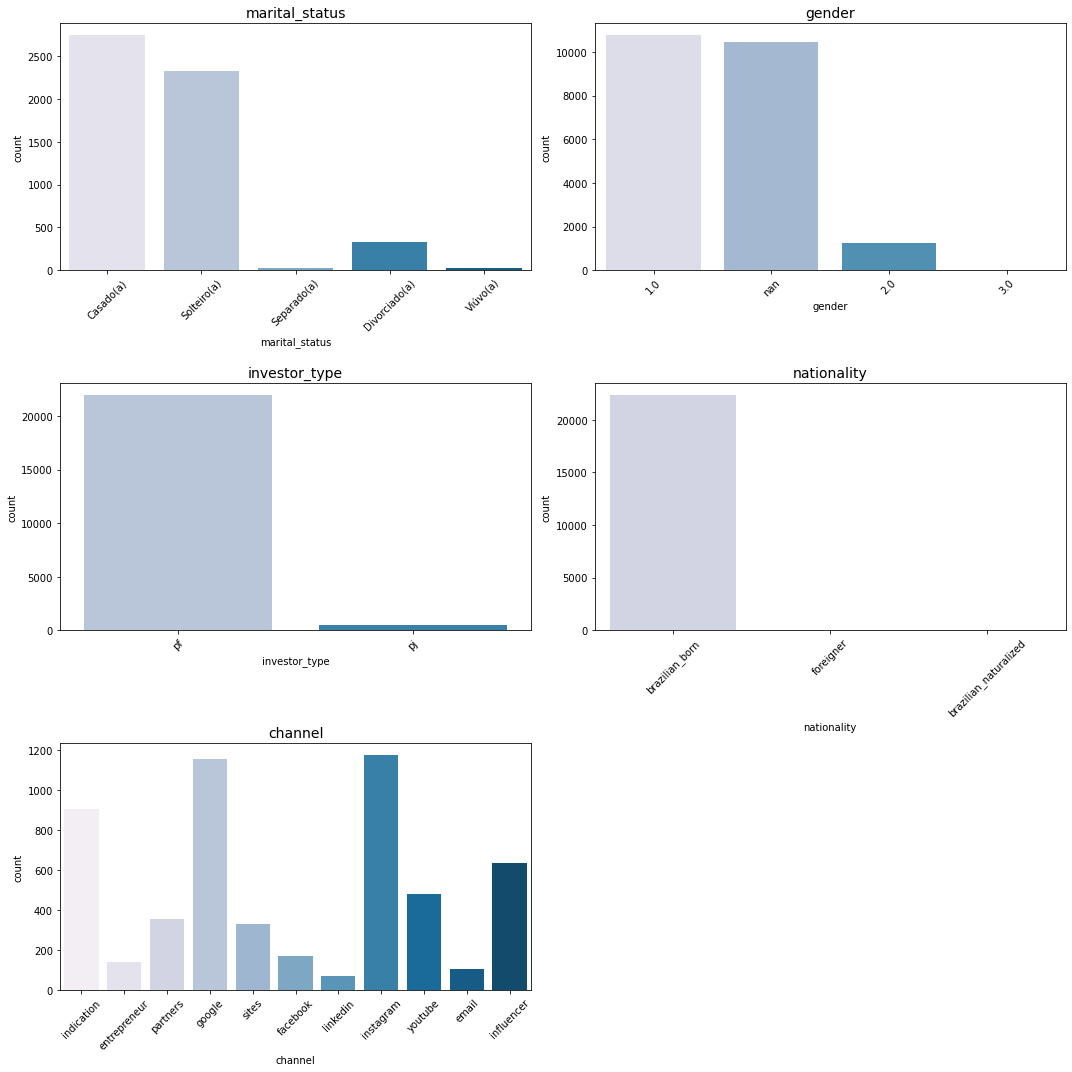

In [49]:
features = cols
plt.figure(figsize = (15, 15))
for i in range(0, len(cols)):
    plt.subplot(3, 2, i+1)    
    sns.countplot(data = investor_data[cols], x = features[i], palette = "PuBu")
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

###### Most common offices

In [50]:
investor_data['office'] = investor_data['office'].replace({'DIRETOR':'Diretor', 'Socio':'Sócio', 'sócio':'Sócio'})

In [51]:
investor_data['office'].value_counts()[:10]

Diretor          318
Sócio            199
CEO              124
Gerente          109
Analista          80
Proprietário      69
Engenheiro        61
Professor         48
Advogado          41
Administrador     40
Name: office, dtype: int64

**Creating a list that contains the most common offices, it'll be used later**

In [52]:
top_offices = investor_data['office'].value_counts()[:10].index.tolist()

In [53]:
top_offices

['Diretor',
 'Sócio',
 'CEO',
 'Gerente',
 'Analista',
 'Proprietário',
 'Engenheiro',
 'Professor',
 'Advogado',
 'Administrador']

###### Most common professions

In [54]:
investor_data['profession'].value_counts()[:10]

Engenheiro              274
Administrador           234
Empresário              177
Advogado                163
Empresario              105
Médico                  101
Economista               74
Analista de Sistemas     74
Engenheiro Civil         68
Empresário               65
Name: profession, dtype: int64

##### Conclusion

**Observations**

- Unfortunately, it is not possible to get much insight into the gender of the investors, as there are many null values. However, of those values that were filled in, the vast majority were male;

- The vast majority of investors are PF;

- The networks/media that are bringing in more clients are Instagram, Google and the indication of other people.

- It would be interest to invest more in publications and advertisements on platforms like Facebook, LinkedIn and Youtube, because compared to other platforms, there are few customers coming from them. In addition, it is also essential to collaborate with influencers and people who are more active in social networks etc., because it is a great way to promote the work and reach a larger number of people;

- You can see that most investors have a higher professional position, such as Director or CEO, for example;

- Regarding professions, the most common among clients are Engineer, Administrator, and Entrepreneur.

### Investment and Project Data

#### Basic Info

In [55]:
investment.head()

,id,date_created,anonymous,investor,project,value
0,19,2018-09-03,0,3,1,1000
1,20,2018-09-03,0,16,1,81000
2,21,2018-09-03,0,6,1,15000
3,26,2018-09-06,0,11,1,10000
4,28,2018-09-06,1,34,1,5000


In [56]:
project.head()

,id,date_created,validity,value,project_category,closed,date_open,modality,target
0,1,2018-08-23,2018-10-31 00:00:00,750000,1,2018-11-01,2018-10-01 08:00:00,1,500000
1,4,2018-12-17,2019-02-28 00:00:00,750000,1,2019-03-10,2019-02-10 08:00:00,1,500000
2,5,2019-04-20,2019-06-14 00:00:00,1020000,1,2019-06-15,2019-05-15 08:00:00,1,680000
3,6,2019-07-29,2019-09-04 00:00:00,1200000,5,2019-08-19,2019-08-05 08:00:00,1,800000
4,7,2019-09-10,2019-10-15 23:59:00,810000,2,2019-09-27,2019-09-16 18:00:00,1,540000


In [57]:
project_category.head()

,id,name
0,1,Imobiliária
1,2,Energia
2,3,Ativos judiciais
3,4,Agronegócio
4,5,Comercial


#### Data Joining

In [58]:
project_cat_mod = project[['id', 'project_category', 'modality']]

In [59]:
investment_plus = investment.merge(project_cat_mod, left_on = 'project', right_on = 'id', how = 'left')

In [60]:
investment_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9123 entries, 0 to 9122
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_x              9123 non-null   object        
 1   date_created      9123 non-null   datetime64[ns]
 2   anonymous         9123 non-null   object        
 3   investor          9123 non-null   object        
 4   project           9123 non-null   object        
 5   value             9123 non-null   int64         
 6   id_y              9123 non-null   object        
 7   project_category  9123 non-null   object        
 8   modality          9123 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 712.7+ KB


##### Dropping and renaming columns from investment_plus datasaet

In [61]:
investment_plus.drop(columns = 'id_y', axis = 1, inplace = True)
investment_plus.rename(columns = {'id_x': 'id'}, inplace = True)
investment_plus = investment_plus.sort_values('date_created')

In [62]:
investment_plus['project_category'].replace({'1':'imobiliaria', '2':'energia', '3':'ativos_jud', '4':'agronegocio', '5':'comercial'}, inplace = True)

In [63]:
investment_plus['modality'].replace({'1':'debt', '2':'equity'}, inplace = True)

##### Visualizing the new dataset

In [64]:
investment_plus.sample(10)

,id,date_created,anonymous,investor,project,value,project_category,modality
1031,1405,2020-08-31,1,5706,22,20000,agronegocio,equity
8776,11674,2022-04-14,0,16420,86,3000,comercial,debt
360,529,2019-11-18,1,1988,9,5000,comercial,debt
3573,4550,2021-05-06,1,9769,46,10000,agronegocio,equity
2464,3203,2021-02-09,0,7070,37,10000,agronegocio,debt
7924,10397,2022-02-02,1,2313,76,1000,comercial,debt
379,550,2019-11-18,0,3001,9,51000,comercial,debt
4754,6026,2021-07-02,1,12426,52,10000,imobiliaria,equity
998,1359,2020-08-25,0,11,21,10000,imobiliaria,debt
8984,12055,2022-05-16,0,20215,86,1000,comercial,debt


#### Data Analysis

##### Data Sample

In [65]:
investment_plus.sample(5)

,id,date_created,anonymous,investor,project,value,project_category,modality
5081,6451,2021-07-16,0,14069,55,5000,energia,equity
1830,2416,2020-12-05,1,5706,29,5000,agronegocio,debt
7963,10443,2022-02-03,0,13865,76,1000,comercial,debt
8651,11460,2022-03-28,1,23140,81,1000,comercial,debt
2418,3150,2021-02-08,0,2994,34,5000,imobiliaria,equity


##### Project Category

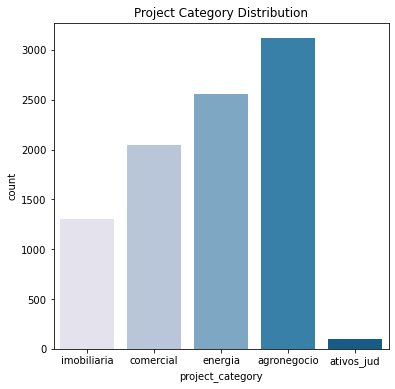

In [66]:
plt.figure(figsize = (6, 6))
sns.countplot(x = investment_plus['project_category'], palette = 'PuBu')
plt.title('Project Category Distribution')
plt.show()

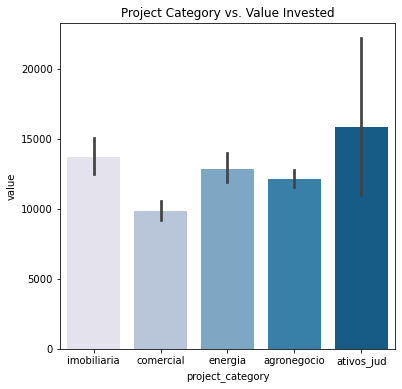

In [95]:
plt.figure(figsize = (6,6))
sns.barplot(x = investment_plus['project_category'], y = investment_plus['value'], palette = 'PuBu')
plt.title('Project Category vs. Value Invested')
plt.show()

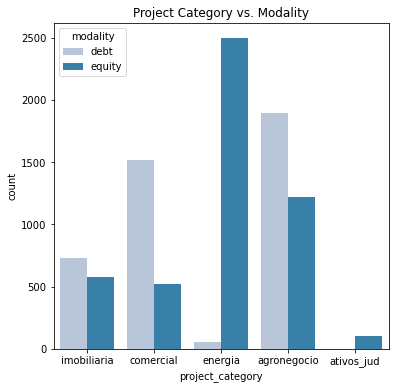

In [68]:
plt.figure(figsize = (6,6))
sns.countplot(x = investment_plus['project_category'], hue = investment_plus['modality'], palette = 'PuBu')
plt.title('Project Category vs. Modality')
plt.show()

##### Investment Modality

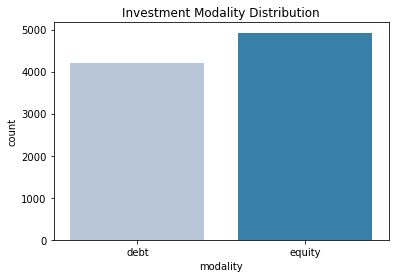

In [69]:
sns.countplot(x = investment_plus['modality'], palette = 'PuBu')
plt.title('Investment Modality Distribution')
plt.show()

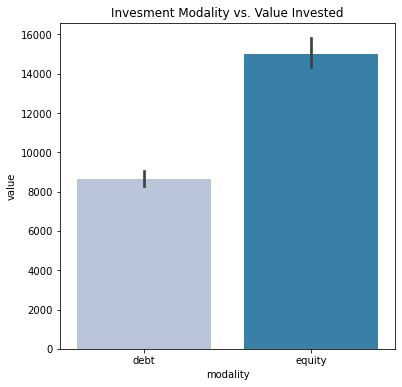

In [96]:
plt.figure(figsize = (6,6))
sns.barplot(x = investment_plus['modality'], y = investment_plus['value'], palette = 'PuBu')
plt.title('Invesment Modality vs. Value Invested')
plt.show()

### Investor and Investment Data

#### Data Joining

In [71]:
investor_charact = investor_data.merge(investment_plus, left_on = 'investor_id', right_on = 'investor', how = 'left')

#### Basic Info

In [72]:
investor_charact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28093 entries, 0 to 28092
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   investor_id       28093 non-null  object        
 1   birth             17856 non-null  datetime64[ns]
 2   marital_status    11066 non-null  object        
 3   gender            28093 non-null  object        
 4   investor_type     28093 non-null  object        
 5   nationality       28093 non-null  object        
 6   channel           7043 non-null   object        
 7   office            10845 non-null  object        
 8   profession        10930 non-null  object        
 9   country           28093 non-null  object        
 10  state             17820 non-null  object        
 11  date              28093 non-null  datetime64[ns]
 12  age_created       17856 non-null  float64       
 13  id                9123 non-null   object        
 14  date_created      9123

#### Dropping unnecessary columns

In [73]:
investor_charact.drop(columns = ['date_created', 'birth', 'date', 'gender', 'nationality'], axis = 1, inplace = True)

In [74]:
investor_charact.isna().any()

investor_id         False
marital_status       True
investor_type       False
channel              True
office               True
profession           True
country             False
state                True
age_created          True
id                   True
anonymous            True
investor             True
project              True
value                True
project_category     True
modality             True
dtype: bool

#### Dropping NaN values

In [75]:
investor_charact.dropna(subset = ['investor','project','value','modality','project_category'], how = 'any', inplace = True)

#### Data Head

In [76]:
investor_charact.head()

,investor_id,marital_status,investor_type,channel,office,profession,country,state,age_created,id,anonymous,investor,project,value,project_category,modality
0,1,Casado(a),pf,indication,CTO,Empresário,1.0,BA,25.0,532,0,1,9,5000.0,comercial,debt
1,1,Casado(a),pf,indication,CTO,Empresário,1.0,BA,25.0,974,0,1,17,5000.0,agronegocio,debt
2,1,Casado(a),pf,indication,CTO,Empresário,1.0,BA,25.0,7653,0,1,62,2500.0,agronegocio,debt
3,3,Casado(a),pf,NaN,CFO,Administrador,1.0,BA,36.0,19,0,3,1,1000.0,imobiliaria,debt
4,3,Casado(a),pf,NaN,CFO,Administrador,1.0,BA,36.0,56,0,3,1,29000.0,imobiliaria,debt


#### Data Analysis 

##### Filtering only investors with top 10 offices

In [78]:
top_offices_data = investor_charact[investor_charact['office'].isin(top_offices)]

## Conclusion
----

**Questions**
- What are the offices of the people who invest the most?
- From which channels customers most often come?
- When the client comes through someone else's indication, in a certain way, it generates a greater confidence of the client in the company. Therefore, does this trust influence the amount invested?
- Which project categories are usually the most invested in?
- At what age do clients usually start investing with the company? Does it influence the amount that is invested?

### Answers

#### What are the offices of the people who invest the most?

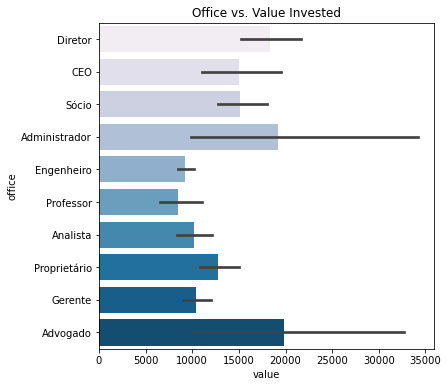

In [93]:
plt.figure(figsize = (6,6))
sns.barplot(y = top_offices_data['office'], x = investor_charact['value'], palette = 'PuBu')
plt.title('Office vs. Value Invested')
plt.show()

#### From which channel customers most often come?

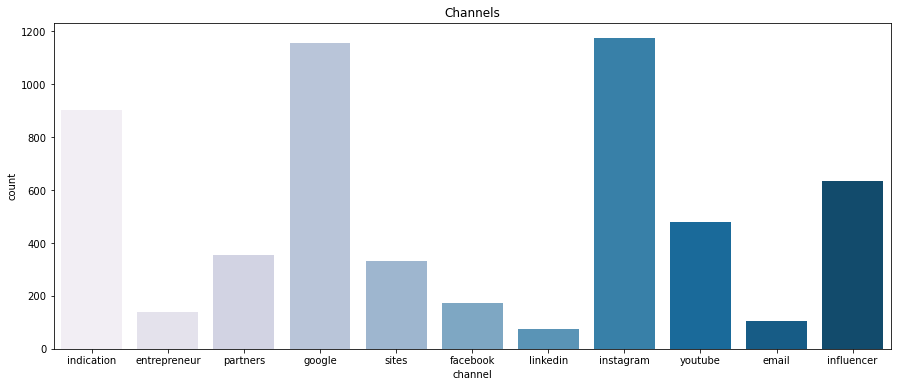

In [80]:
plt.figure(figsize = (15,6))
sns.countplot(investor_data['channel'], palette = 'PuBu')
plt.title('Channels')
plt.show()

Looking at the chart above, it can be seen that the most common channels are Google, Instagram and indication from others. In addition, coming through influencers is also common.

**Ideas**
- Some platforms like Facebook and Youtube can be better leveraged;

- It is worth having some kind of incentive for those who indicate the service to other people. For example, when referring someone, if the person actually becomes a client, the person who referred receives an amount in investments or a discount;

- It is interesting to make more partnerships with influencers (both people and pages), because besides having a greater power of influence, they can reach a larger audience. 

#### When the client comes through someone else's indication, in a certain way, it generates a greater confidence of the client in the company. Therefore, does this trust influence the amount invested?

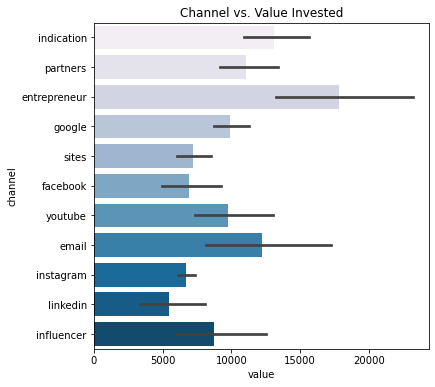

In [92]:
plt.figure(figsize = (6,6))
sns.barplot(y = investor_charact['channel'], x = investor_charact['value'], palette = 'PuBu')
plt.title('Channel vs. Value Invested')
plt.show()

Considering the average amount invested, when the client comes by recommendation, he really tends to invest more, due to the trust he has in the company.

#### Which project categories are usually the most invested in?

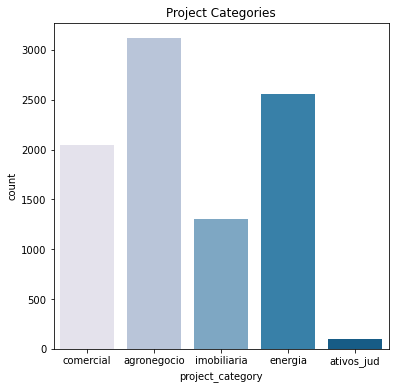

In [82]:
plt.figure(figsize = (6,6))
sns.countplot(investor_charact['project_category'], palette = 'PuBu')
plt.title('Project Categories')
plt.show()

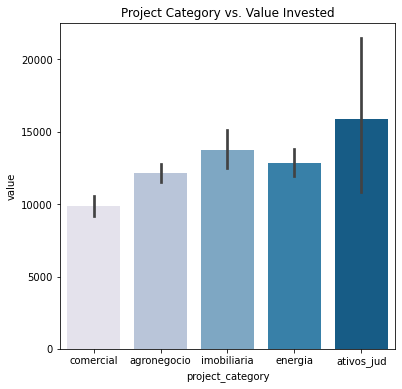

In [94]:
plt.figure(figsize = (6,6))
sns.barplot(x = investor_charact['project_category'], y = investor_charact['value'], palette = 'PuBu')
plt.title('Project Category vs. Value Invested')
plt.show()

The total amount invested in the Imobiliária and Ativos Judiciais categories is interesting, because even though there are not as many investments in these categories (compared to agronegócio and energia, for example), there is as much invested in them as in the others.

- The Ativos Judiciais category is surprising, as there are very few investments in this category, and yet it raises as much as the Comercial or Energia category, which have many more investments, for example.

#### At what age do clients usually start investing with the company? Does it influence the amount that is invested?

In [84]:
round(investor_charact['age_created'].describe())

count    9113.0
mean       41.0
std        10.0
min        -0.0
25%        34.0
50%        38.0
75%        45.0
max       148.0
Name: age_created, dtype: float64

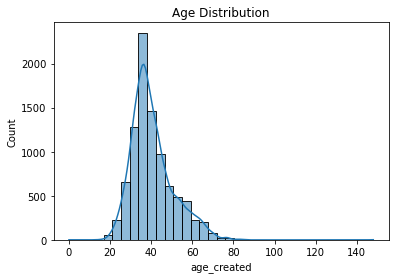

In [85]:
sns.histplot(x = investor_charact['age_created'], palette = 'PuBu', kde = True, bins = 35)
plt.title('Age Distribution')
plt.show()

In [86]:
round(investor_charact['age_created'].corr(investor_charact['value']),2)

0.13

- The great majority of clients started investing at about 40-45 years old, and the average age is 41;
- Apparently, age does not influence the amount invested, considering that the value for Pearson's correlation is 0.13.